In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
oo=pd.read_csv('zomato.csv',sep=',',encoding='latin-1')

In [3]:
oo.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


The dataset is highly skewed toward the cities included in Delhi-NCR. 
So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. 

Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

1)Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

2)Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

3)Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

4)Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

## 1)Delhi-NCR vs Rest of India Restaurant Count(Bar Graph)

In [4]:
ncrct=['New Delhi','Ghaziabad','Noida','Faridabad']
def checkncr(st):
    if st in ncrct:
        return False
    else:
        return True

In [5]:
ncr=oo[(oo.City=='New Delhi')|(oo.City=='Ghaziabad')|(oo.City=='Noida')|(oo.City=='Faridabad')]

#### NCR dataset sample

In [6]:
ncr.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
3024,18306523,Cafí© MRP,1,New Delhi,"1st Floor, C-39, Opposite Odean Cinema, Connau...",Connaught Place,"Connaught Place, New Delhi",77.220891,28.634497,"North Indian, Chinese, Italian, Mediterranean",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,877


In [7]:
restofindia=oo[(oo['City'].apply(checkncr))&(oo['Country Code']==1)]

#### Rest of India Dataset Sample

In [8]:
restofindia.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
1534,313204,E Yum,1,Gurgaon,"Plot H-16/6, MG Road, Gurgaon",MG Road,"MG Road, Gurgaon",77.100318,28.477732,"Continental, Italian, Mexican",...,Indian Rupees(Rs.),No,Yes,Yes,No,2,3.4,Orange,Average,69
2444,15309,Mocha,1,Ludhiana,"27 & 28 F, 1st Floor, Malhar Road, Gurdev Naga...",Gurdev Nagar,"Gurdev Nagar, Ludhiana",75.822103,30.895204,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,153


In [9]:
ncrcount=len(list(ncr['Restaurant ID']))

In [10]:
roicount=len(list(restofindia['Restaurant ID']))

In [11]:
print(ncrcount,roicount)

6829 1823


Text(0, 0.5, 'Number of Restaurants')

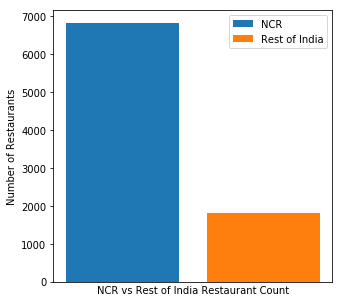

In [12]:
plt.figure(figsize=(5,5))
plt.bar(1,ncrcount)
plt.bar(2,roicount)
plt.xticks([])
plt.gca().legend(('NCR','Rest of India'))
plt.xlabel('NCR vs Rest of India Restaurant Count')
plt.ylabel('Number of Restaurants')

## 2)Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [15]:
import requests
import json

userkey='27299ca04f97031673347f76514c6678'
header = {'user-key':userkey}
params={'city_id':'1'}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params=params)
response.status_code

200

In [18]:
ncrapicuisines=[]
for i in json.loads(response.content)['cuisines']:
    ncrapicuisines.append(i['cuisine']['cuisine_name'])

### Cuisines available in NCR according to Zomato API

In [20]:
ncrapicuisines

['Afghan',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Armenian',
 'Asian',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Cuisine Varies',
 'Desserts',
 'Ethiopian',
 'European',
 'Falafel',
 'Fast Food',
 'Finger Food',
 'French',
 'Fried Chicken',
 'Frozen Yogurt',
 'German',
 'Goan',
 'Greek',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Italian',
 'Japanese',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mishti',
 'Mithai',
 'Modern Australian',
 'Modern Indian',
 'Momos',
 'Moroccan',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North

In [47]:
len(ncrapicuisines)

114

### Cuisines available in NCR according to Dataset

In [37]:
ncrdscuisines={}
for i in list(set(ncr['Cuisines'])):
    cuisines=i.split(',')
    for j in cuisines:
        if j in ncrdscuisines:
            ncrdscuisines[j]+=1
        else:
            ncrdscuisines[j]=1
        

In [38]:
ncrdatasetcuisines=list(ncrdscuisines.keys())

In [34]:
ncrdatasetcuisines

['Cafe',
 ' Italian',
 ' Fast Food',
 'Bakery',
 ' Mithai',
 'North Indian',
 ' Continental',
 ' Asian',
 ' American',
 'Fast Food',
 ' Pizza',
 'Mithai',
 ' Street Food',
 ' Chinese',
 ' Awadhi',
 ' Spanish',
 ' Mediterranean',
 ' Mughlai',
 ' Seafood',
 'Lebanese',
 ' Arabian',
 'Street Food',
 ' North Indian',
 'American',
 ' Tex-Mex',
 ' Mexican',
 'Cuisine Varies',
 'South Indian',
 ' Tea',
 ' Desserts',
 'Continental',
 ' Healthy Food',
 ' Lebanese',
 ' Tibetan',
 'Mexican',
 ' Biryani',
 'Asian',
 ' Sushi',
 ' Thai',
 'Chinese',
 ' South Indian',
 ' Beverages',
 'European',
 ' Bakery',
 ' Japanese',
 ' Korean',
 ' Raw Meats',
 'Mughlai',
 ' Finger Food',
 ' Middle Eastern',
 'Ice Cream',
 'Biryani',
 'Parsi',
 ' Iranian',
 'Japanese',
 'Raw Meats',
 ' North Eastern',
 'Arabian',
 'Lucknowi',
 ' Kashmiri',
 ' European',
 ' Armenian',
 ' Burger',
 ' Bengali',
 ' Maharashtrian',
 'Salad',
 ' British',
 'Afghani',
 'Burger',
 'Oriya',
 'Italian',
 'Pizza',
 ' Afghani',
 ' Cafe',
 ' 

In [46]:
len(ncrdatasetcuisines)

142

### Cuisines available in Rest of India acording to Dataset

In [39]:
roidscuisines={}
for i in list(set(restofindia['Cuisines'])):
    cuisines=i.split(',')
    for j in cuisines:
        if j in roidscuisines:
            roidscuisines[j]+=1
        else:
            roidscuisines[j]=1
        

In [41]:
roidatasetcuisines=list(roidscuisines.keys())

### Cuisines that are available in India but not in Delhi NCR (According to provided dataset)

In [42]:
notncr=[]
for i in ncrdatasetcuisines:
    if i not in roidatasetcuisines:
        notncr.append(i)

In [43]:
notncr

['Cuisine Varies',
 ' Raw Meats',
 ' Kashmiri',
 'Salad',
 ' Afghani',
 ' Naga',
 'Malaysian',
 ' Sri Lankan',
 'Vietnamese',
 'Sushi',
 'Assamese',
 'Nepalese',
 ' Bihari',
 'Naga',
 'Spanish',
 ' Moroccan',
 'Turkish',
 'Middle Eastern',
 ' Turkish',
 ' Deli',
 'British']

### Cuisines that are available in India but not in Delhi NCR (According to Zomato API)

In [50]:
notncr=[]
for i in ncrapicuisines:
    if i not in roidatasetcuisines:
        notncr.append(i)

In [45]:
notncr

['Afghan',
 'African',
 'Armenian',
 'Assamese',
 'BBQ',
 'Bar Food',
 'Belgian',
 'Bohri',
 'Brazilian',
 'British',
 'Bubble Tea',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Coffee',
 'Cuisine Varies',
 'Ethiopian',
 'Falafel',
 'Fried Chicken',
 'Frozen Yogurt',
 'German',
 'Hot dogs',
 'Indonesian',
 'Iranian',
 'Israeli',
 'Kebab',
 'Malaysian',
 'Mangalorean',
 'Middle Eastern',
 'Mishti',
 'Modern Australian',
 'Momos',
 'Moroccan',
 'Naga',
 'Nepalese',
 'Oriental',
 'Paan',
 'Pakistani',
 'Panini',
 'Patisserie',
 'Peruvian',
 'Poké',
 'Roast Chicken',
 'Rolls',
 'Russian',
 'Salad',
 'Sandwich',
 'Singaporean',
 'Spanish',
 'Sri Lankan',
 'Sushi',
 'Tamil',
 'Turkish',
 'Vegetarian',
 'Vietnamese',
 'Wraps']

## Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [51]:
ncrdscuisines

{'Cafe': 90,
 ' Italian': 203,
 ' Fast Food': 190,
 'Bakery': 29,
 ' Mithai': 56,
 'North Indian': 222,
 ' Continental': 157,
 ' Asian': 57,
 ' American': 42,
 'Fast Food': 56,
 ' Pizza': 24,
 'Mithai': 30,
 ' Street Food': 83,
 ' Chinese': 307,
 ' Awadhi': 2,
 ' Spanish': 3,
 ' Mediterranean': 30,
 ' Mughlai': 73,
 ' Seafood': 25,
 'Lebanese': 8,
 ' Arabian': 6,
 'Street Food': 24,
 ' North Indian': 259,
 'American': 26,
 ' Tex-Mex': 6,
 ' Mexican': 47,
 'Cuisine Varies': 1,
 'South Indian': 30,
 ' Tea': 4,
 ' Desserts': 44,
 'Continental': 82,
 ' Healthy Food': 17,
 ' Lebanese': 25,
 ' Tibetan': 13,
 'Mexican': 10,
 ' Biryani': 16,
 'Asian': 18,
 ' Sushi': 7,
 ' Thai': 65,
 'Chinese': 84,
 ' South Indian': 110,
 ' Beverages': 36,
 'European': 18,
 ' Bakery': 39,
 ' Japanese': 26,
 ' Korean': 7,
 ' Raw Meats': 3,
 'Mughlai': 14,
 ' Finger Food': 16,
 ' Middle Eastern': 7,
 'Ice Cream': 11,
 'Biryani': 10,
 'Parsi': 2,
 ' Iranian': 1,
 'Japanese': 11,
 'Raw Meats': 7,
 ' North Eastern'

### Top 10 Cuisines served in Delhi NCR

In [91]:
ncrdscuisines['North Indian']=ncrdscuisines['North Indian']+ncrdscuisines[' North Indian']
ncrdscuisines[' North Indian']=0
count=0
for w in sorted(ncrdscuisines, key=ncrdscuisines.get, reverse=True):
    if count<10:
        #if w in 'North '
        print(w, ncrdscuisines[w])
        count+=1
    else:
        break

North Indian 740
 Chinese 307
 Italian 203
 Fast Food 190
 Continental 157
 South Indian 110
Cafe 90
Chinese 84
 Street Food 83
Continental 82


### Top 10 Cuisines served in Rest of India

In [88]:
roidict={}
roidscuisines['North Indian']=roidscuisines['North Indian']+roidscuisines[' North Indian']
roidscuisines[' North Indian']=0
count=0
for w in sorted(roidscuisines, key=roidscuisines.get, reverse=True):
    if count<10:
        print(w, roidscuisines[w])
        count+=1
    else:
        break

North Indian 302
 Chinese 176
 Italian 130
 Continental 121
 Fast Food 79
Continental 66
Cafe 64
 Mexican 52
Chinese 49
 Thai 48


## Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [71]:
ncr.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4661,307370,The Coffee Bean & Tea Leaf,1,New Delhi,"62, Middle Lane, Khan Market, New Delhi",Khan Market,"Khan Market, New Delhi",77.226998,28.600043,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,3.8,Yellow,Good,256
2596,7610,Green Chick Chop,1,New Delhi,"10 & 11, Narmada Market, Opposite Don Bosco Sc...",Alaknanda,"Alaknanda, New Delhi",77.246899,28.528109,"Raw Meats, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,35
7775,8530,Aggarwal Confectionary,1,New Delhi,"38, DDA Market, Vasundhara Enclave, New Delhi",Vasundhara Enclave,"Vasundhara Enclave, New Delhi",77.317668,28.599715,"Street Food, Bakery",...,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,7


In [72]:
restofindia.sample(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2117,18128902,Begonia,1,Gurgaon,"C Block, Phase 1, Sushant Lok, Gurgaon",Sushant Lok,"Sushant Lok, Gurgaon",0.000000,0.000000,Bakery,...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,8
2517,3600072,Nanking,1,Mysore,"High Tension Double Road, Near Vidyavardhaka C...",Vijay Nagar,"Vijay Nagar, Mysore",76.617889,12.337928,"Chinese, Thai",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,208
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41


### Cuisines served in NCR

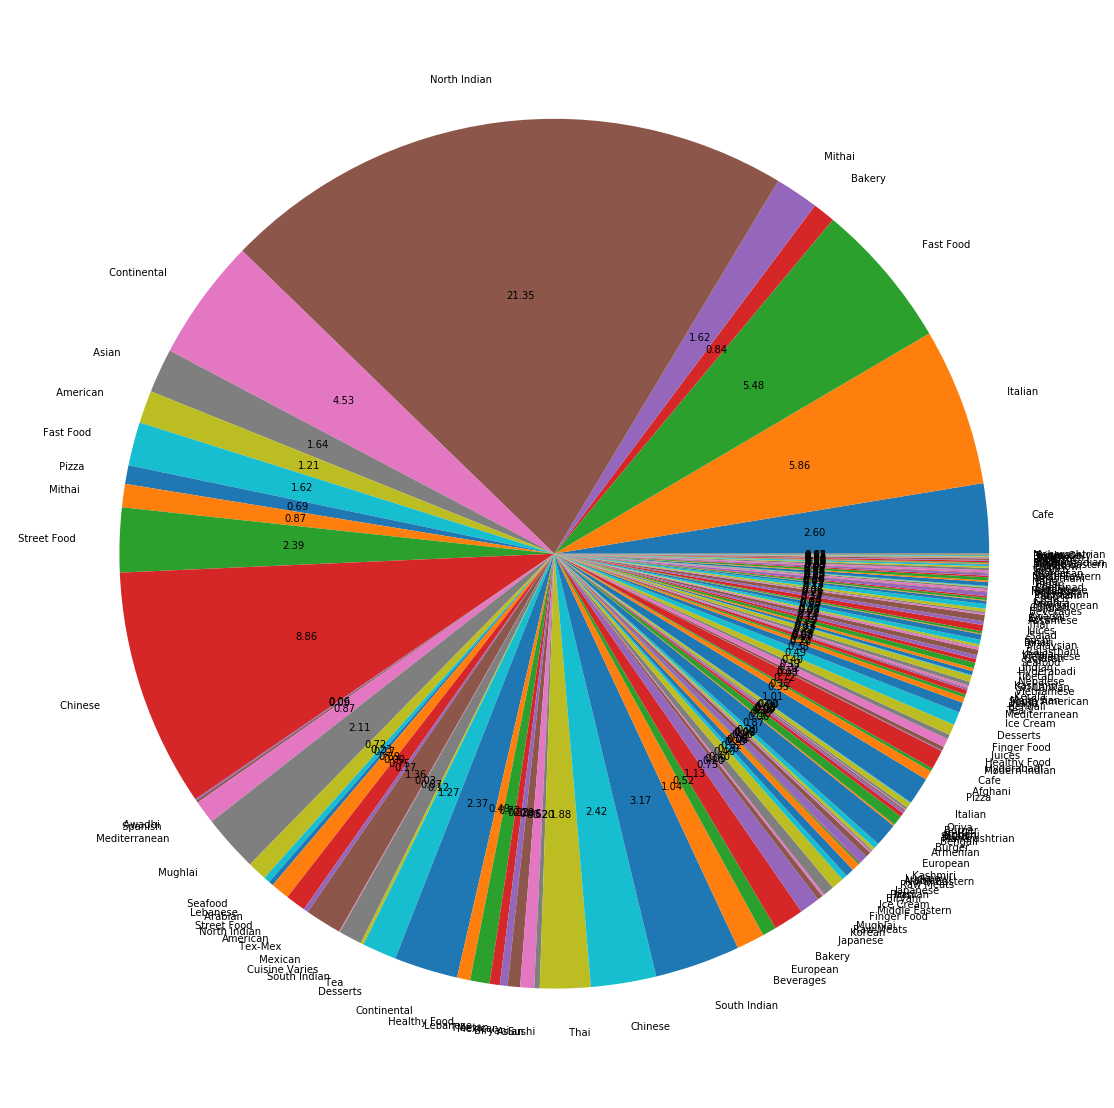

In [89]:
plt.figure(figsize=(20,20))
plt.pie(ncrdscuisines.values(),labels=list(ncrdscuisines.keys()),autopct='%.2f');

### Cuisines served in Rest of India

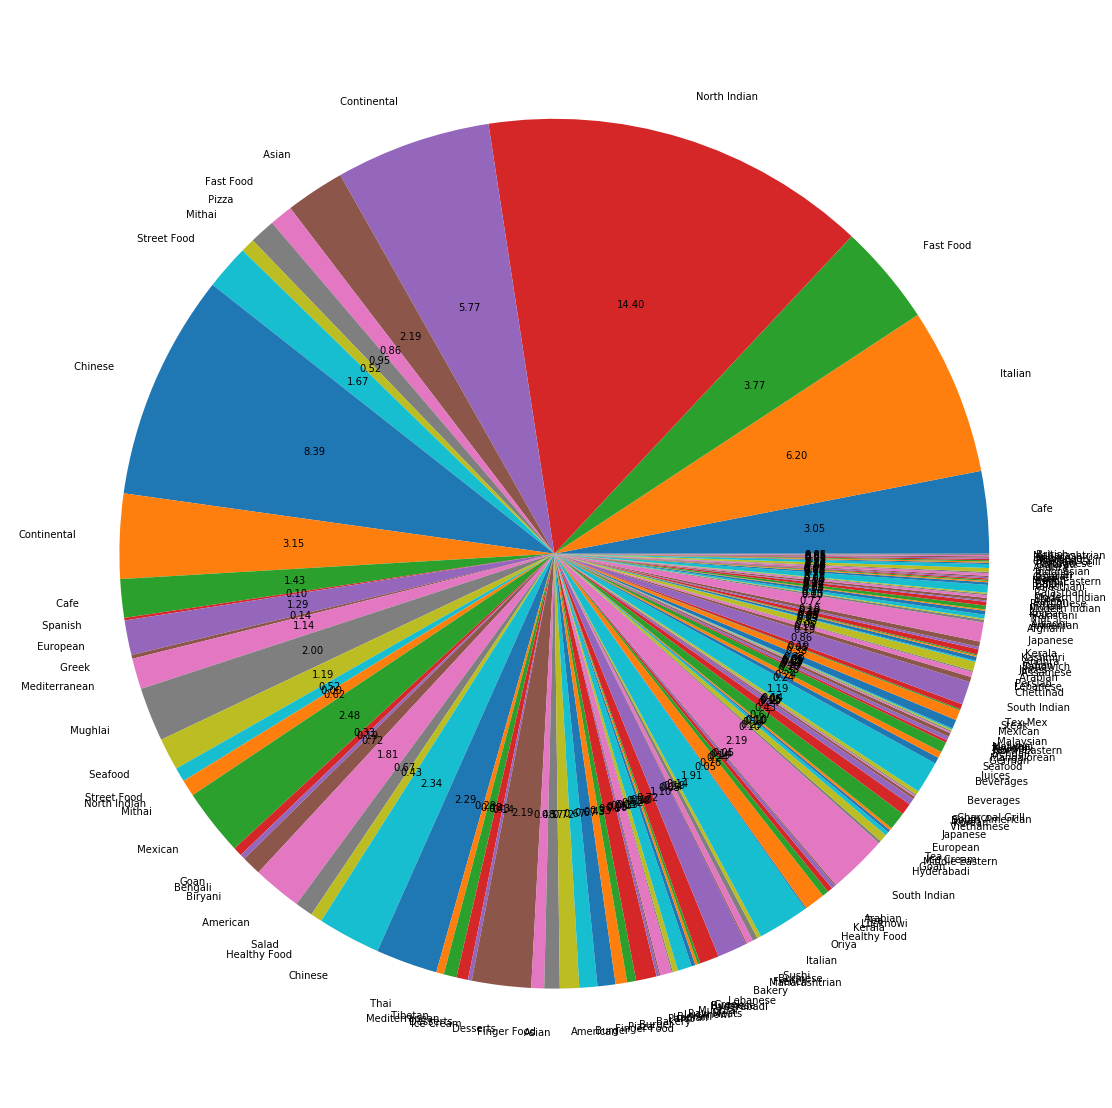

In [90]:
plt.figure(figsize=(20,20))
plt.pie(roidscuisines.values(),labels=list(roidscuisines.keys()),autopct='%.2f');

While 'North Indian' and 'Chinese' cuisines are popular in NCR and Rest of India, 'Street Food' cuisine is definitely more popular in NCR than in Rest of India.

Also, we can see that 'Thai' and 'Mexican' cuisines aren't as popular in NCR as they are in Rest of India